# Web Scrapping 

**Top 100 African Twitter Influencers - **https://africafreak.com/100-most-influential-twitter-users-in-africa

**Top African Government Officials - **https://www.atlanticcouncil.org/blogs/africasource/african-leaders-respond-to-coronavirus-on-twitter/#east-africa


In [1]:
#importing the necessary libraries needed for web scraping
from requests import get
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup
import pandas as pd
import os, sys

import fire

In [25]:
#%%writefile ../pyscrap_url.py

def simple_get(url):
    """
    Attempts to get the content at `url` by making an HTTP GET request.
    If the content-type of response is some kind of HTML/XML, return the
    text content, otherwise return None.
    """
    try:
        with closing(get(url, stream=True)) as resp:
            if is_good_response(resp):
                return resp.content  #.encode(BeautifulSoup.original_encoding)
            else:
                return None

    except RequestException as e:
        log_error('Error during requests to {0} : {1}'.format(url, str(e)))
        return None


def is_good_response(resp):
    """
    Returns True if the response seems to be HTML, False otherwise.
    """
    content_type = resp.headers['Content-Type'].lower()
    return (resp.status_code == 200 
            and content_type is not None 
            and content_type.find('html') > -1)


def log_error(e):
    """
    It is always a good idea to log errors. 
    This function just prints them, but you can
    make it do anything.
    """
    print(e)
    
def get_elements(url, tag='',search={}, fname=None):
    """
    Downloads a page specified by the url parameter
    and returns a list of strings, one per tag element
    """
    
    if isinstance(url,str):
        response = simple_get(url)
    else:
        #if already it is a loaded html page
        response = url

    if response is not None:
        html = BeautifulSoup(response, 'html.parser')
        
        res = []
        if tag:    
            for li in html.select(tag):
                for name in li.text.split('\n'):
                    if len(name) > 0:
                        res.append(name.strip())
    
                       
                
        if search:
            soup = html            
            
            
            r = ''
            if 'find' in search.keys():
                print('findaing',search['find'])
                soup = soup.find(**search['find'])
                r = soup

                
            if 'find_all' in search.keys():
                print('findaing all of',search['find_all'])
                r = soup.find_all(**search['find_all'])
   
            if r:
                for x in list(r):
                    if len(x) > 0:
                        res.extend(x)
                            
        return res

    # Raise an exception if we failed to get any data from the url
    raise Exception('Error retrieving contents at {}'.format(url))    
    
    
if get_ipython().__class__.__name__ == '__main__':
    fire(get_tag_elements)

**obtaining the african top twitter influencers data from a website and cleaning the data to get their twitter username**

In [421]:
#python code to obtain 100 African Twitter Influencers
res = get_elements('https://africafreak.com/100-most-influential-twitter-users-in-africa', tag='h2')
res.reverse()

#converting the list into string
list_inf = str(res)

#deriving the top 100 african twitter influencers using regex
listinf = re.findall(r"@[\w]*", list_inf)
count = 1
print("""\nTop 100 African Twitter Influencers:
       \n--------------------------------------\n""")
for aff in listinf:
    print (f"{count}. {aff}")
    count = count+1

#saving data as csv file
dat = pd.DataFrame(listinf, columns=['Influencers'])
dat.to_csv('top_100_african_influencers_.csv')


Top 100 African Twitter Influencers:
       
--------------------------------------

1. @Trevornoah
2. @GarethCliff
3. @SAPresident
4. @News24
5. @Julius_S_Malema
6. @helenzille
7. @mailandguardian
8. @5FM
9. @loyisogola
10. @Computicket
11. @MTVbaseAfrica
12. @OfficialCSA
13. @702JohnRobbie
14. @UlrichJvV
15. @euphonik
16. @BBCAndrewH
17. @Camfed
18. @BobSkinstad
19. @SamsungSA
20. @liveamp
21. @hartleyr
22. @SmithInAfrica
23. @gertjohan
24. @_AfricanUnion
25. @SandtonCity
26. @ParliamentofRSA
27. @Mo_IbrahimFdn
28. @NDOCKenya
29. @PeterGreste
30. @JendayiFrazer
31. @art2gee
32. @IECSouthAfrica
33. @forbesafrica
34. @Entrepreneur_SA
35. @geoffreyyork
36. @The_New_Age
37. @HenleyAfrica
38. @IFCAfrica
39. @africaprogress
40. @MbuyiseniNdlozi
41. @FoodBlogCT
42. @AfricaResearch
43. @MadeItInAfrica
44. @cnbcafrica
45. @willintune
46. @AfricaGoodNews
47. @ThinkAfricaFeed
48. @CityofJoburgZA
49. @theafricareport
50. @Afrinnovator
51. @schneiderhome
52. @TheStar_news
53. @rangerdiaries
54. 

**obtaining the african top government official data from a website and cleaning the data to get their twitter username**

In [424]:
#Python code to obtain the twitter account of African top government officials
url= 'https://www.atlanticcouncil.org/blogs/africasource/african-leaders-respond-to-coronavirus-on-twitter/#east-africa'
response = simple_get(url)

res_gov = get_elements(response, search={'find_all':{'class_':'wp-block-embed__wrapper'}})

#converting the data to string
list_gov = str(res_gov)

#importing regular expression
import re

#deriving the government officials twitter handles using regex
listnew = re.findall(r"@[\w]*", list_gov)
count = 0
print("""\nTop Government Officials Twitter Handles:
        \n------------------------------------------\n""")
for off in listnew:
    print (f"{count+1}. {off}")
    count = count+1


#saving data as csv file
dat2 = pd.DataFrame(listnew, columns=['Government Officials'])
dat2.to_csv('top_government_officials.csv')

findaing all of {'class_': 'wp-block-embed__wrapper'}

Top Government Officials Twitter Handles:
        
------------------------------------------

1. @EswatiniGovern1
2. @MalawiGovt
3. @hagegeingob
4. @FinanceSC
5. @PresidencyZA
6. @Dora_Siliya
7. @ChitaluChilufy3
8. @noalaskinner
9. @coumbagadio_ZM
10. @unicefzambia
11. @UNZambia
12. @mohzambia
13. @edmnangagwa
14. @MinSantedj
15. @hawelti
16. @StateHouseKenya
17. @WHO
18. @StateHouseKenya
19. @Macky_Sall
20. @MagufuliJP
21. @Presidence_RDC
22. @CyrilRamaphosa
23. @BorisJohnson
24. @KGeorgieva
25. @PaulKagame
26. @M_Farmaajo
27. @SouthSudanGov
28. @SudanPMHamdok
29. @TZSpokesperson
30. @KagutaMuseveni
31. @angola_Mirex
32. @willynyamitwe
33. @Cherif_MZ
34. @Presidence_RDC
35. @PresidentABO
36. @gouvbenin
37. @PresidenceBenin
38. @rochkaborepf
39. @PresidenciaCV
40. @AOuattara_PRCI
41. @Presidency_GMB
42. @NAkufoAddo
43. @President_GN
44. @USEmbalo
45. @PresidenceMali
46. @CheikhGhazouani
47. @IssoufouMhm
48. @MBuhari
49. @PaulKagam

# Twitter API

In [57]:
#Variables that contains the user credentials to access Twitter API 
consumer_key = 'XXXXXXXXXX'
consumer_secret = 'XXXXXXXXX'
access_token = 'XXXXXXXXX'
access_token_secret = 'XXXXXXXXXXX'            

#This handles Twitter authetification and the connection to Twitter Streaming API
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
               
api = tweepy.API(auth)

**Obtaining the follower count, friend count, number of tweets and screen name for african influencers from the Twitter API**

In [422]:
#getting the followers count, following, number of tweets, and screen name of the african influencers
followers_count = {}
following_count ={}
num_of_tweets = {}
screen_name = {}

for count in range(len(listinf)): 
    try:
        user = api.get_user(listinf[count])
        followers_count[listinf[count]]= user.followers_count
        following_count[listinf[count]] = user.friends_count
        num_of_tweets[listinf[count]] = user.statuses_count
        screen_name[listinf[count]] = user.screen_name
    except Exception as e:
        pass

In [423]:
#adding the follower_count, following_count, number of tweets, and screen name as a new column in the influencers dataframe
dat['Follower_count']= dat['Influencers'].map(followers_count)
dat['Following_count']= dat['Influencers'].map(following_count)
dat['Number_of_Tweets']= dat['Influencers'].map(num_of_tweets)
dat['Screen_name']= dat['Influencers'].map(screen_name)

#removing rows with no values
dat.dropna(inplace=True)

#condition to only choose influencers with more than 1000 followers
dat = dat[dat['Follower_count'] > 1000]

#removing rows with duplicate values and keeping the first occurence
dat.drop_duplicates(subset='Screen_name', keep="first", inplace=True)
dat.set_index('Screen_name')

,Influencers,Follower_count,Following_count,Number_of_Tweets
Screen_name,,,,
Trevornoah,@Trevornoah,10812341.0,325.0,11186.0
GarethCliff,@GarethCliff,1974748.0,356.0,31628.0
News24,@News24,3580616.0,632.0,323106.0
Julius_S_Malema,@Julius_S_Malema,3132698.0,651.0,37224.0
helenzille,@helenzille,1443572.0,2302.0,72335.0
mailandguardian,@mailandguardian,1060534.0,478.0,144351.0
5FM,@5FM,1164559.0,411.0,62874.0
loyisogola,@loyisogola,1085327.0,3951.0,5694.0
Computicket,@Computicket,200270.0,1225.0,45141.0


**Obtaining the follower count, friend count, number of tweets and screen name for government officials from the Twitter API**

In [425]:
#getting the followers count, following, number of tweets, description and screen name of the government officials
followers_count2 = {}
following_count2 ={}
num_of_tweets2 = {}
screen_name2 = {}
for count in range(len(listnew)):
   
    try:
        user = api.get_user(listnew[count])
        followers_count2[listnew[count]]= user.followers_count
        following_count2[listnew[count]] = user.friends_count
        num_of_tweets2[listnew[count]] = user.statuses_count
        screen_name2[listnew[count]] = user.screen_name
    except Exception as e:
        pass

In [426]:
"""adding the follower_count, following_count, number of tweets,
and screen name as a new column in the government official handle
dataframe
"""
dat2['Follower_count']= dat2['Government Officials'].map(followers_count2)
dat2['Following_count']= dat2['Government Officials'].map(following_count2)
dat2['Number_of_Tweets']= dat2['Government Officials'].map(num_of_tweets2)
dat2['Screen_name']= dat2['Government Officials'].map(screen_name2)

#removing rows with no values
dat2.dropna(inplace=True)

#condition to only choose government officials with more than 1000 followers
dat2 = dat2[dat2['Follower_count'] > 1000]

#removing rows with duplicate values and keeping the first occurence
dat2.drop_duplicates(subset='Screen_name', keep="first", inplace=True)
dat2.set_index('Screen_name')

,Government Officials,Follower_count,Following_count,Number_of_Tweets
Screen_name,,,,
EswatiniGovern1,@EswatiniGovern1,11348,82,1686
MalawiGovt,@MalawiGovt,39424,26,4030
hagegeingob,@hagegeingob,192758,55,1087
PresidencyZA,@PresidencyZA,1600915,14,18888
Dora_Siliya,@Dora_Siliya,40943,13,290
noalaskinner,@noalaskinner,1597,895,2884
unicefzambia,@unicefzambia,29107,1080,2419
UNZambia,@UNZambia,3483,190,413
mohzambia,@mohzambia,7210,95,838


**python code to search and download tweets of influencers and government officials**

In [22]:
#python code to search and download tweets of influencers and government officials
#importing all the necessary libraries needed
import sys
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import re
import string

# to view all columns
pd.set_option("display.max.columns", None)

#Import the necessary methods from tweepy library  
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

#sentiment analysis package
from textblob import TextBlob

#general text pre-processor
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

#tweet pre-processor 
import preprocessor as p

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [90]:
class tweetsearch():
    '''
    This is a basic class to search and download twitter data.
    You can build up on it to extend the functionalities for more 
    sophisticated analysis
    '''
    def __init__(self, cols=None,auth=None):
        #
        if not cols is None:
            self.cols = cols
        else:
            self.cols = ['id', 'created_at', 'source', 'original_text','clean_text', 
                    'sentiment','polarity','subjectivity', 'lang',
                    'favorite_count', 'retweet_count', 'original_author',   
                    'possibly_sensitive', 'hashtags',
                    'user_mentions', 'place', 'place_coord_boundaries']
            
        if auth is None:
            
            #Variables that contains the user credentials to access Twitter API 
            consumer_key = 'XXXXXXXXXX'
            consumer_secret = 'XXXXXXXXX'
            access_token = 'XXXXXXXXX'
            access_token_secret = 'XXXXXXXXXXX' 
            


            #This handles Twitter authetification and the connection to Twitter Streaming API
            auth = OAuthHandler(consumer_key, consumer_secret)
            auth.set_access_token(access_token, access_token_secret)
            

        #            
        self.auth = auth
        self.api = tweepy.API(auth) 
        self.filtered_tweet = ''
        
    
    def limit_handled(cursor, list_name):
        while True:
            try:
                yield cursor.next()
            except tweepy.RateLimitError:
                print("\nCurrent number of data points in list = " + str(len(list_name)))
                print('Hit Twitter API rate limit.')
                for i in range(3, 0, -1):
                  print("Wait for {} mins.".format(i * 5))
                  time.sleep(5 * 60)
            except tweepy.error.TweepError:
                print('\nCaught TweepError exception' )       

    def clean_tweets(self, twitter_text):

        #use pre processor
        tweet = p.clean(twitter_text)

         #HappyEmoticons
        emoticons_happy = set([
            ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
            ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
            '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
            'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
            '<3'
            ])

        # Sad Emoticons
        emoticons_sad = set([
            ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
            ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
            ':c', ':{', '>:\\', ';('
            ])

        #Emoji patterns
        emoji_pattern = re.compile("["
                 u"\U0001F600-\U0001F64F"  # emoticons
                 u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                 u"\U0001F680-\U0001F6FF"  # transport & map symbols
                 u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                 u"\U00002702-\U000027B0"
                 u"\U000024C2-\U0001F251"
                 "]+", flags=re.UNICODE)

        #combine sad and happy emoticons
        emoticons = emoticons_happy.union(emoticons_sad)

        stop_words = set(stopwords.words('english'))
        word_tokens = nltk.word_tokenize(tweet)
        #after tweepy preprocessing the colon symbol left remain after      
        #removing mentions
        tweet = re.sub(r':', '', tweet)
        tweet = re.sub(r'‚Ä¶', '', tweet)

        #replace consecutive non-ASCII characters with a space
        tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)

        #remove emojis from tweet
        tweet = emoji_pattern.sub(r'', tweet)

        #filter using NLTK library append it to a string
        filtered_tweet = [w for w in word_tokens if not w in stop_words]

        #looping through conditions
        filtered_tweet = []    
        for w in word_tokens:
        #check tokens against stop words , emoticons and punctuations
            if w not in stop_words and w not in emoticons and w not in string.punctuation:
                filtered_tweet.append(w)

        return ' '.join(filtered_tweet)            

    def get_tweets(self, user, csvfile=None):
        
        
        df = pd.DataFrame(columns=self.cols)
        
        if not csvfile is None:
            #If the file exists, then read the existing data from the CSV file.
            if os.path.exists(csvfile):
                df = pd.read_csv(csvfile, header=0)
            

        #page attribute in tweepy.cursor and iteration
        for page in tweepy.Cursor(api.user_timeline, id=user, include_rts=False).pages(20):

            # the you receive from the Twitter API is in a JSON format and has quite an amount of information attached
            for status in page:
                
                new_entry = []
                status = status._json
                
                #filter by language
                if status['lang'] != 'en':
                    continue

                
                #if this tweet is a retweet update retweet count
                if status['created_at'] in df['created_at'].values:
                    i = df.loc[df['created_at'] == status['created_at']].index[0]
                    #
                    cond1 = status['favorite_count'] != df.at[i, 'favorite_count']
                    cond2 = status['retweet_count'] != df.at[i, 'retweet_count']
                    if cond1 or cond2:
                        df.at[i, 'favorite_count'] = status['favorite_count']
                        df.at[i, 'retweet_count'] = status['retweet_count']
                    continue

                #calculate sentiment
                filtered_tweet = self.clean_tweets(status['text'])
                blob = TextBlob(filtered_tweet)
                Sentiment = blob.sentiment     
                polarity = Sentiment.polarity
                subjectivity = Sentiment.subjectivity

                new_entry += [status['id'], status['created_at'],
                              status['source'], status['text'], filtered_tweet, 
                              Sentiment,polarity,subjectivity, status['lang'],
                              status['favorite_count'], status['retweet_count']]

                new_entry.append(status['user']['screen_name'])

                try:
                    is_sensitive = status['possibly_sensitive']
                except KeyError:
                    is_sensitive = None

                new_entry.append(is_sensitive)

                hashtags = ", ".join([hashtag_item['text'] for hashtag_item in status['entities']['hashtags']])
                new_entry.append(hashtags) #append the hashtags

                #
                mentions = ", ".join([mention['screen_name'] for mention in status['entities']['user_mentions']])
                new_entry.append(mentions) #append the user mentions

                try:
                    xyz = status['place']['bounding_box']['coordinates']
                    coordinates = [coord for loc in xyz for coord in loc]
                except TypeError:
                    coordinates = None
                #
                new_entry.append(coordinates)

                try:
                    location = status['user']['location']
                except TypeError:
                    location = ''
                #
                new_entry.append(location)

                #now append a row to the dataframe
                single_tweet_df = pd.DataFrame([new_entry], columns=self.cols)
                df = df.append(single_tweet_df, ignore_index=True)

        if not csvfile is None:
            #save it to file
            df.to_csv(csvfile, columns=self.cols, index=False, encoding="utf-8")
            
        return df

In [91]:
"""
#creating a csv file for the government officials twitter data and
calling the tweetsearch function
"""
tweets_file = 'officials.csv'
ts = tweetsearch()

In [92]:
 #username based search
    ##get data on username
for handle in dat2['Government Officials']:
    df = ts.get_tweets(handle, csvfile=tweets_file)    #you saved the
    print("Printing for user:",handle)

Printing for user: @EswatiniGovern1
Printing for user: @MalawiGovt
Printing for user: @hagegeingob
Printing for user: @PresidencyZA
Printing for user: @Dora_Siliya
Printing for user: @noalaskinner
Printing for user: @unicefzambia
Printing for user: @UNZambia
Printing for user: @mohzambia
Printing for user: @edmnangagwa
Printing for user: @MinSantedj
Printing for user: @hawelti
Printing for user: @StateHouseKenya
Printing for user: @WHO
Printing for user: @StateHouseKenya
Printing for user: @Macky_Sall
Printing for user: @MagufuliJP
Printing for user: @Presidence_RDC
Printing for user: @CyrilRamaphosa
Printing for user: @BorisJohnson
Printing for user: @KGeorgieva
Printing for user: @PaulKagame
Printing for user: @M_Farmaajo
Printing for user: @SouthSudanGov
Printing for user: @SudanPMHamdok
Printing for user: @TZSpokesperson
Printing for user: @KagutaMuseveni
Printing for user: @angola_Mirex
Printing for user: @willynyamitwe
Printing for user: @Cherif_MZ
Printing for user: @Presidence_

In [99]:
"""
#creating a csv file for the influencers twitter data and
calling the tweetsearch function
"""
tweets_file2 = 'influencers.csv'
ts = tweetsearch()

#getting the data for the top African Influencers
for handle in dat['Influencers']:
    ##get data on username
    df = ts.get_tweets(handle, csvfile=tweets_file2)  
    print("Printing for user:",handle)

Printing for user: @Trevornoah
Printing for user: @GarethCliff
Printing for user: @News24
Printing for user: @Julius_S_Malema
Printing for user: @helenzille
Printing for user: @mailandguardian
Printing for user: @5FM
Printing for user: @loyisogola
Printing for user: @Computicket
Printing for user: @MTVbaseAfrica
Printing for user: @OfficialCSA
Printing for user: @UlrichJvV
Printing for user: @euphonik
Printing for user: @Camfed
Printing for user: @BobSkinstad
Printing for user: @SamsungSA
Printing for user: @liveamp
Printing for user: @hartleyr
Printing for user: @gertjohan
Printing for user: @_AfricanUnion
Printing for user: @SandtonCity
Printing for user: @ParliamentofRSA
Printing for user: @Mo_IbrahimFdn
Printing for user: @NDOCKenya
Printing for user: @PeterGreste
Printing for user: @JendayiFrazer
Printing for user: @art2gee
Printing for user: @IECSouthAfrica
Printing for user: @forbesafrica
Printing for user: @geoffreyyork
Printing for user: @HenleyAfrica
Printing for user: @IFCAf

**calculating popularity score, reach score and relevance score of the government officials**

In [427]:
#importing the twitter data for government officials
data_gov = pd.read_csv(tweets_file)

#creating a dataframe from the data imported
gov_df = pd.DataFrame(data_gov)

#python code to calculate the total retweets and likes 
new = gov_df.groupby('original_author', sort=False)['favorite_count','retweet_count'].agg('sum')
new.columns = ['Favorite_count','Retweet_count']

#merging the previous government officials dataframe with the favorite count and retweet count
new_gov_df = pd.merge(dat2, new, left_on='Screen_name', right_on='original_author', how='outer')
new_gov_df.dropna(inplace=True)

#calculating the popularity score
new_gov_df['Popularity_score'] = new_gov_df['Retweet_count'] + new_gov_df['Favorite_count']

#calculating the reach score
new_gov_df['Reach_score'] = new_gov_df['Follower_count'] - new_gov_df['Following_count']
new_gov_df

,Government Officials,Follower_count,Following_count,Number_of_Tweets,Screen_name,Favorite_count,Retweet_count,Popularity_score,Reach_score
0,@EswatiniGovern1,11348,82,1686,EswatiniGovern1,21953.0,5702.0,27655.0,11266
1,@MalawiGovt,39424,26,4030,MalawiGovt,15792.0,6125.0,21917.0,39398
2,@hagegeingob,192758,55,1087,hagegeingob,146232.0,28295.0,174527.0,192703
3,@PresidencyZA,1600915,14,18888,PresidencyZA,73511.0,29954.0,103465.0,1600901
4,@Dora_Siliya,40943,13,290,Dora_Siliya,27320.0,4072.0,31392.0,40930
5,@noalaskinner,1597,895,2884,noalaskinner,1879.0,308.0,2187.0,702
6,@unicefzambia,29107,1080,2419,unicefzambia,9428.0,2925.0,12353.0,28027
7,@UNZambia,3483,190,413,UNZambia,1324.0,570.0,1894.0,3293
8,@mohzambia,7210,95,838,mohzambia,1957.0,1071.0,3028.0,7115
9,@edmnangagwa,547539,116,628,edmnangagwa,570137.0,130695.0,700832.0,547423


**calculating popularity score, reach score and relevance score of the african influencers**

In [428]:
#importing the twitter data for top african influencers
data_inf = pd.read_csv(tweets_file2)

#creating a dataframe from the data imported
inf_df = pd.DataFrame(data_inf)

#python code to calculate the total retweets and likes 
new2 = inf_df.groupby('original_author', sort=False)['favorite_count','retweet_count'].agg('sum')
new2.columns = ['Favorite_count','Retweet_count']

#merging the previous government officials dataframe with the favorite count and retweet count
new_inf_df = pd.merge(dat, new2, left_on='Screen_name', right_on='original_author', how='outer')
new_inf_df.dropna(inplace=True)

#calculating the popularity score
new_inf_df['Popularity_score'] = new_inf_df['Retweet_count'] + new_inf_df['Favorite_count']

#calculating the reach score
new_inf_df['Reach_score'] = new_inf_df['Follower_count'] - new_inf_df['Following_count']
new_inf_df

,Influencers,Follower_count,Following_count,Number_of_Tweets,Screen_name,Favorite_count,Retweet_count,Popularity_score,Reach_score
0,@Trevornoah,10812341.0,325.0,11186.0,Trevornoah,1832022,272162,2104184,10812016.0
1,@GarethCliff,1974748.0,356.0,31628.0,GarethCliff,18954,3765,22719,1974392.0
2,@News24,3580616.0,632.0,323106.0,News24,29495,10223,39718,3579984.0
3,@Julius_S_Malema,3132698.0,651.0,37224.0,Julius_S_Malema,173051,36308,209359,3132047.0
4,@helenzille,1443572.0,2302.0,72335.0,helenzille,37111,7912,45023,1441270.0
5,@mailandguardian,1060534.0,478.0,144351.0,mailandguardian,2119,1335,3454,1060056.0
6,@5FM,1164559.0,411.0,62874.0,5FM,9173,1464,10637,1164148.0
7,@loyisogola,1085327.0,3951.0,5694.0,loyisogola,15434,2164,17598,1081376.0
8,@Computicket,200270.0,1225.0,45141.0,Computicket,230,84,314,199045.0
9,@MTVbaseAfrica,1416517.0,109.0,56047.0,MTVBaseAfrica,21504,3833,25337,1416408.0


**Getting top 5 unique hashtag from the top 10 retweets of the influencers and government official twitter data**

In [745]:
#top 5 unique hashtag from influencers data

#sorting data in descending order by retweets
tag_df = inf_df.sort_values(by='retweet_count', ascending=False)

#cleaning the data to get single hashtags
clean_tag = tag_df['hashtags'].str.split((', '), expand=True).rename(columns = lambda x: "hashtag"+str(x+1))
clean_tag[['original_author','retweet_count', 'category']] = tag_df[['original_author','retweet_count', 'category']]
clean_tag

clean_tag_new = clean_tag.melt(id_vars=['original_author','retweet_count','category'], value_name='hashtags')
clean_tag_new = clean_tag_new.dropna() 
clean_tag_new

#grouping data by hashtags and getting the count
tag_df_new = clean_tag_new.groupby(['hashtags'],sort=False).count()
tag_df_new = tag_df_new.apply(lambda _tag_df_new: _tag_df_new).reset_index()
tag_df_new

#displaying the top 5 hashtags
tag_inf = []
print("Top 5 Unique Influencer Hashtag:\n")
for i in range(5):
    tagname = tag_df_new['hashtags'][i]
    print(tagname)
    tag_inf.append(tagname)
    
print("\n",tag_inf,"\n")


#top 5 unique hashtag from government official data

#sorting data in descending order by retweets
tag_df2 = gov_df.sort_values(by='retweet_count', ascending=False)

#cleaning the data to get single hashtags
clean_tag2 = tag_df2['hashtags'].str.split((', '), expand=True).rename(columns = lambda x: "hashtag"+str(x+1))
clean_tag2[['original_author','retweet_count', 'category']] = tag_df2[['original_author','retweet_count', 'category']]
clean_tag2

clean_tag_new2 = clean_tag2.melt(id_vars=['original_author','retweet_count','category'], value_name='hashtags')
clean_tag_new2 = clean_tag_new2.dropna() 
clean_tag_new2['hashtags']

#grouping data by hashtags and getting the count
tag_df_new2 = clean_tag_new2.groupby(['hashtags'],sort=False).count()
tag_df_new2 = tag_df_new2.apply(lambda _tag_df_new2: _tag_df_new2).reset_index()
tag_df_new2

#displaying the top 5 hashtags
tag_gov = []
print("Top 5 Unique Government Official Hashtag:\n")
for i in range(5):
    tagname2 = tag_df_new2['hashtags'][i]
    print(tagname2)
    tag_gov.append(tagname2)
    
print("\n",tag_gov,)

Top 5 Unique Influencer Hashtag:

AwholeNewSong
ProudAfrican
MatchInAfrica
MissUniverse2019
MakhayaNtini

 ['AwholeNewSong', 'ProudAfrican', 'MatchInAfrica', 'MissUniverse2019', 'MakhayaNtini'] 

Top 5 Unique Government Official Hashtag:

coronavirus
SafeHands
VEDay75
WebbEllisCup
Rwanda

 ['coronavirus', 'SafeHands', 'VEDay75', 'WebbEllisCup', 'Rwanda']


**Getting combined top 5 unique hashtag of the government officials and influencer twitter data**

In [727]:
#joining the african influencers and government officials data into one dataframe
whole_df = pd.concat([gov_df, inf_df])

#sorting the dataframe by retweet count
top_10_retweets = whole_df.sort_values('retweet_count',ascending=False)
top_10_retweets = top_10_retweets[['original_author','retweet_count','hashtags', 'category']].dropna()
top_10_retweets = top_10_retweets[top_10_retweets['retweet_count'] > 10]
top_10_retweets
    
#cleaning the data to get individual hashtag
top_hashtags = top_10_retweets['hashtags'].str.split((', '), expand=True).rename(columns = lambda x: "hashtag"+str(x+1))
top_hashtags[['original_author','retweet_count', 'category']] = top_10_retweets[['original_author','retweet_count', 'category']]
top_hashtags

top_hashtags_new = top_hashtags.melt(id_vars=['original_author','retweet_count','category'], value_name='hashtags')
top_hashtags_new = top_hashtags_new.dropna() 
top_hashtags_new['hashtags']

#grouping dataframe by hashtags and category and sorting the hashtag count in descending order
hashtag_group = top_hashtags_new.groupby(['hashtags','category'], sort=False, as_index=False)['hashtags'].agg(['count'])
hashtag_group.columns = ['count_hashtag']
hashtag_group = hashtag_group.reset_index(level=['hashtags','category'])
hashtag_group = hashtag_group.apply(lambda _hashtag_group: _hashtag_group).sort_values(by='count_hashtag', ascending=False).reset_index()

#creating a new dataframe for the top 5 unique hashtag
hashtag_group_1 = pd.DataFrame(hashtag_group[0:6])
hashtag_group_1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


,index,hashtags,category,count_hashtag
0,9,COVID19,government_official,573
1,160,Eritrea,government_official,159
2,29,COVID19,influencer,113
3,204,Ramaphosa,government_official,100
4,113,SONA2019,government_official,56
5,452,Africa,influencer,53


# Data Visualization - Seaborn Barplot

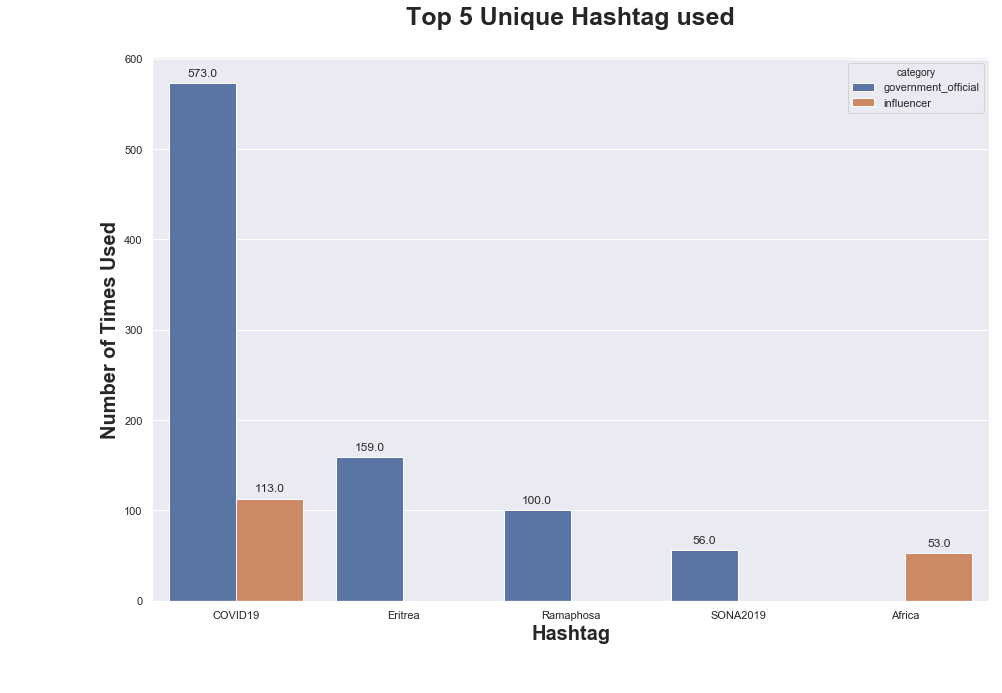

In [750]:
plt.figure(figsize=(15,10)) #customizing the size of the plot
sns.set(style="darkgrid") #customizing the style of the plot

#visualizing the data using bar plot
tagplot = sns.barplot(x='hashtags', y='count_hashtag', hue = 'category',
                        data=hashtag_group_1
                )

#getting the values of the data
for p in tagplot.patches:
    tagplot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2.,
                            p.get_height()), ha = 'center', va = 'center', 
                            xytext = (0, 10), textcoords = 'offset points')

#setting the parameters for the title, x and y labels of the plot
tagplot.set_title("Top 5 Unique Hashtag used\n", size=25, weight='bold')
tagplot.set_xlabel("Hashtag", size=20, weight='bold')
tagplot.set_ylabel("Number of Times Used", size=20, weight='bold')

"""#changing the rotation of the x axis tick labels 
for item in tagplot.get_xticklabels():
    item.set_rotation(45)"""

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('hashtag.png') #saving the figure
plt.show()

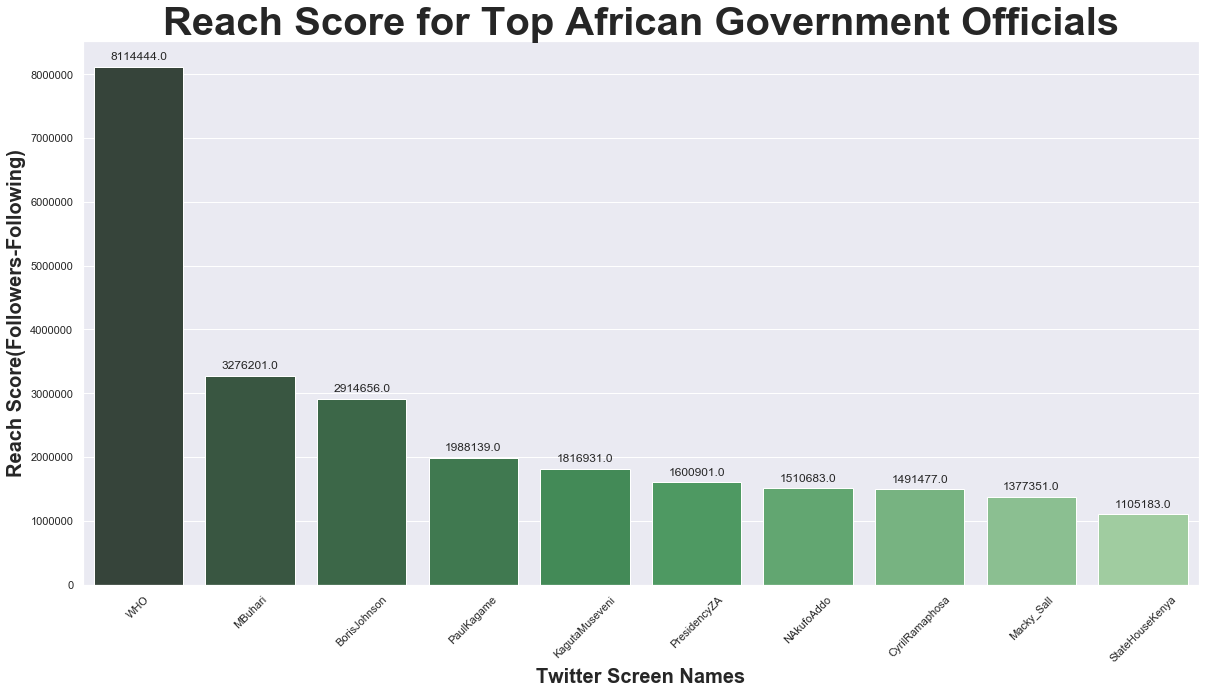

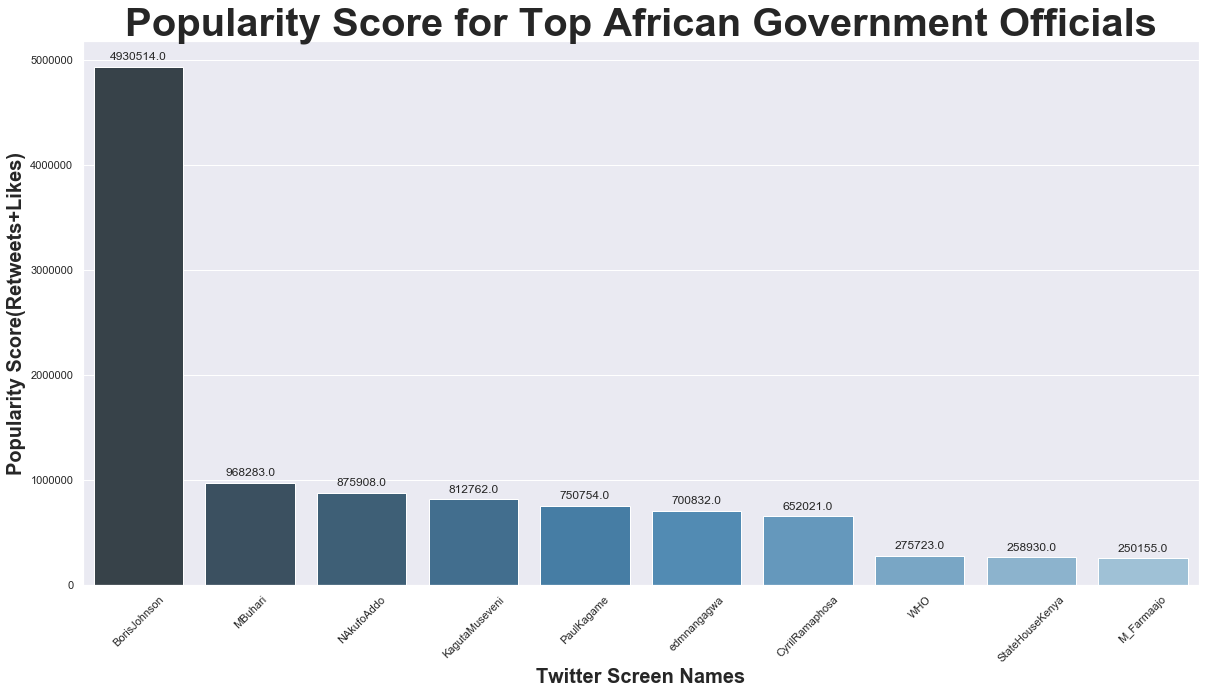

In [748]:
##data visualization - government officials

#importing library for data visualization
import seaborn as sns

#bar plot - reach score
plt.figure(figsize=(20,10)) #customizing the size of the plot
sns.set(style="darkgrid") #customizing the style of the plot

#visualizing the data using bar plot
ax = sns.barplot(x='Screen_name', y='Reach_score', palette="Greens_d",
                data=new_gov_df.sort_values(by='Reach_score', ascending=False)[0:10]
                )

#getting the values of the data
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2.,
                            p.get_height()), ha = 'center', va = 'center', 
                            xytext = (0, 10), textcoords = 'offset points')

#setting the parameters for the title, x and y labels of the plot
ax.set_title("Reach Score for Top African Government Officials", size=40, weight='bold')
ax.set_xlabel("Twitter Screen Names", size=20, weight='bold')
ax.set_ylabel("Reach Score(Followers-Following)", size=20, weight='bold')

#changing the rotation of the x axis tick labels 
for item in ax.get_xticklabels():
    item.set_rotation(45)
    
plt.savefig('reach.png') #saving the figure
plt.show()

#bar plot - popularity score
plt.figure(figsize=(20,10)) #customizing the size of the plot
sns.set(style="darkgrid") #customizing the style of the plot

#visualizing the data using bar plot
ax2 = sns.barplot(x='Screen_name', y='Popularity_score', palette="Blues_d",
                data=new_gov_df.sort_values(by='Popularity_score', ascending=False)[0:10]
                )

#getting the values of the data
for p in ax2.patches:
    ax2.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2.,
                            p.get_height()), ha = 'center', va = 'center', 
                            xytext = (0, 10), textcoords = 'offset points')

#setting the parameters for the title, x and y axis labels of the plot
ax2.set_title("Popularity Score for Top African Government Officials", size=40, weight='bold')
ax2.set_xlabel("Twitter Screen Names", size=20, weight='bold')
ax2.set_ylabel("Popularity Score(Retweets+Likes)", size=20, weight='bold')

#changing the rotation of the x axis tick labels
for item in ax2.get_xticklabels():
    item.set_rotation(45)
    
plt.savefig('popularity.png')#saving the figure
plt.show()

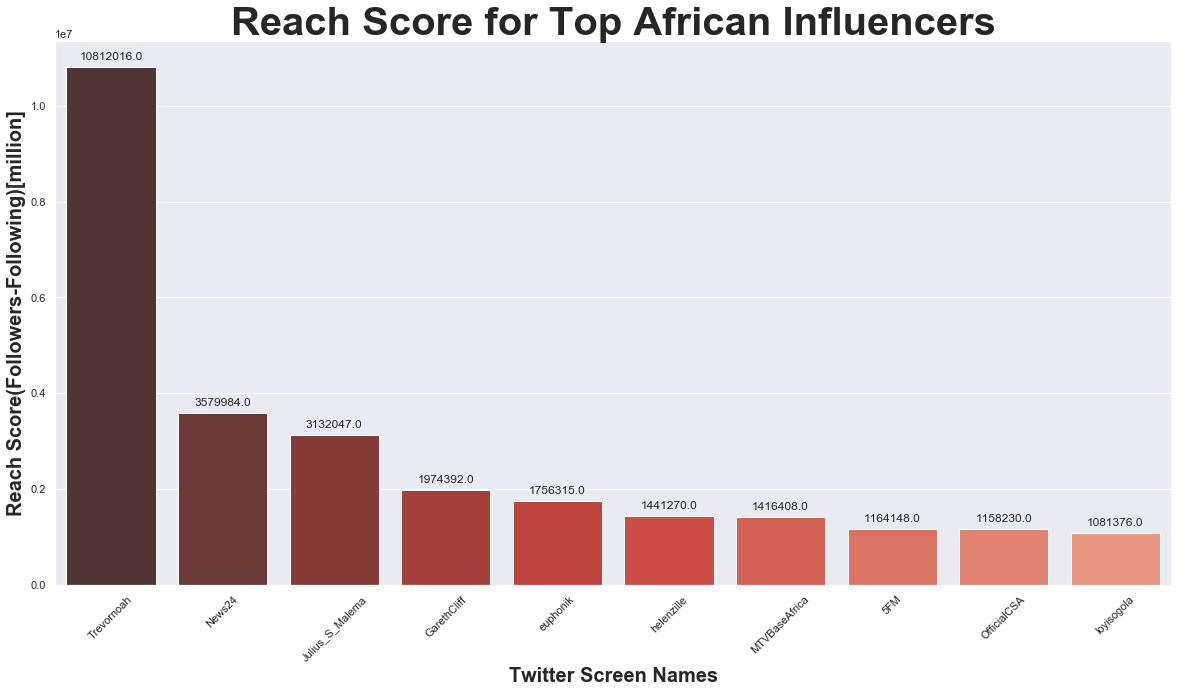

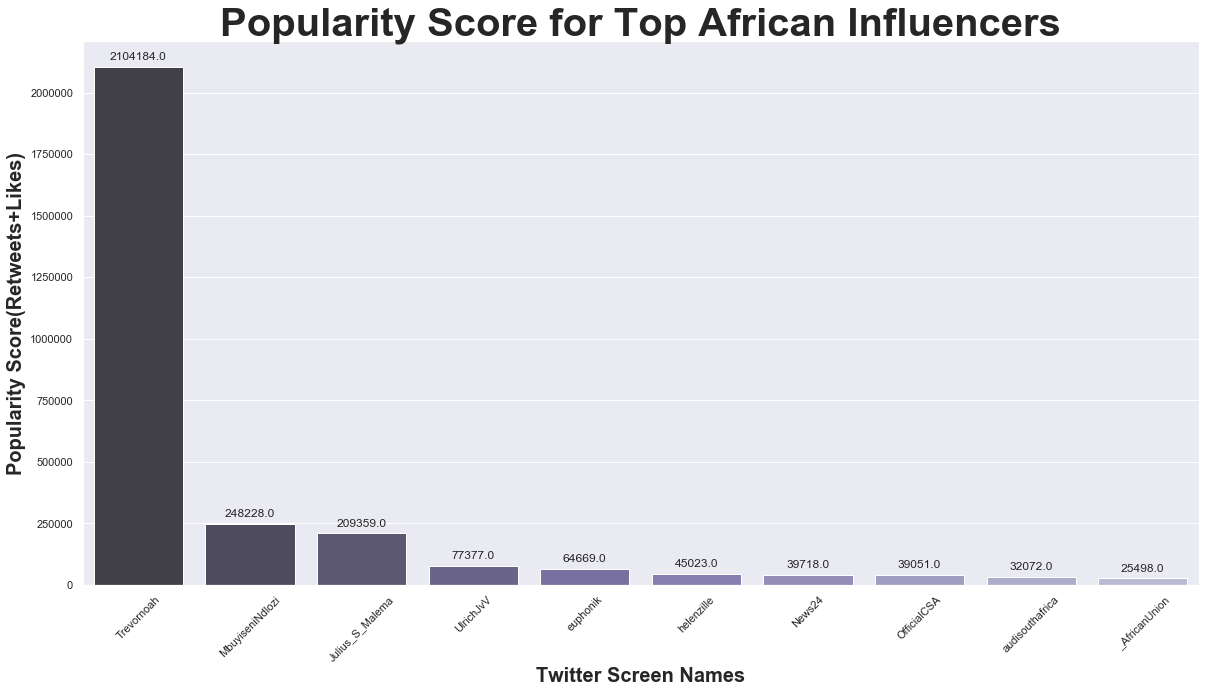

In [747]:
##data visualization - influencers

#bar plot - reach score
plt.figure(figsize=(20,10)) #customizing the size of the plot
sns.set(style="darkgrid") #customizing the style of the plot

#visualizing the data using bar plot
ax = sns.barplot(x='Screen_name', y='Reach_score', palette="Reds_d",
                data=new_inf_df.sort_values(by='Reach_score', ascending=False)[0:10]
                )

#getting the values of the data
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2.,
                            p.get_height()), ha = 'center', va = 'center', 
                            xytext = (0, 10), textcoords = 'offset points')

#setting the parameters for the title, x and y labels of the plot
ax.set_title("Reach Score for Top African Influencers", size=40, weight='bold')
ax.set_xlabel("Twitter Screen Names", size=20, weight='bold')
ax.set_ylabel("Reach Score(Followers-Following)[million]", size=20, weight='bold')

#changing the rotation of the x axis tick labels 
for item in ax.get_xticklabels():
    item.set_rotation(45)
    
plt.savefig('reachinf.png') #saving the figure
plt.show()

#bar plot - popularity score
plt.figure(figsize=(20,10)) #customizing the size of the plot
sns.set(style="darkgrid") #customizing the style of the plot

#visualizing the data using bar plot
ax2 = sns.barplot(x='Screen_name', y='Popularity_score', palette="Purples_d",
                data=new_inf_df.sort_values(by='Popularity_score', ascending=False)[0:10]
                )

#getting the values of the data
for p in ax2.patches:
    ax2.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2.,
                            p.get_height()), ha = 'center', va = 'center', 
                            xytext = (0, 10), textcoords = 'offset points')

#setting the parameters for the title, x and y axis labels of the plot
ax2.set_title("Popularity Score for Top African Influencers", size=40, weight='bold')
ax2.set_xlabel("Twitter Screen Names", size=20, weight='bold')
ax2.set_ylabel("Popularity Score(Retweets+Likes)", size=20, weight='bold')

#changing the rotation of the x axis tick labels
for item in ax2.get_xticklabels():
    item.set_rotation(45)
    
plt.savefig('popularityinf.png')#saving the figure
plt.show()